#Part 1

In [ ]:
#mounting my drive
#mounting drive to read saved file with the data that was provided
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Loading necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticks
import seaborn as sns

import missingno as miss
import datetime as dt
import statsmodels.tsa.api as tsa

In [ ]:
#Loading individual datasets for analyis (Failed to upload the zipped one at once because of the size)
#Loading the data"

df1 = pd.read_csv("/content/drive/MyDrive/Data/Chicago-Crime_2001.csv")
df2 = pd.read_csv("/content/drive/MyDrive/Data/Chicago-Crime_2002.csv")
df3 = pd.read_csv("/content/drive/MyDrive/Data/Chicago-Crime_2003.csv")
df4 = pd.read_csv("/content/drive/MyDrive/Data/Chicago-Crime_2004.csv")
df5 = pd.read_csv("/content/drive/MyDrive/Data/Chicago-Crime_2005.csv")
df6 = pd.read_csv("/content/drive/MyDrive/Data/Chicago-Crime_2006.csv")
df7 = pd.read_csv("/content/drive/MyDrive/Data/Chicago-Crime_2007.csv")
df8 = pd.read_csv("/content/drive/MyDrive/Data/Chicago-Crime_2008.csv")
df9 = pd.read_csv("/content/drive/MyDrive/Data/Chicago-Crime_2009.csv")
df10 = pd.read_csv("/content/drive/MyDrive/Data/Chicago-Crime_2010.csv")
df11 = pd.read_csv("/content/drive/MyDrive/Data/Chicago-Crime_2011.csv")
df12 = pd.read_csv("/content/drive/MyDrive/Data/Chicago-Crime_2012.csv")
df13 = pd.read_csv("/content/drive/MyDrive/Data/Chicago-Crime_2013.csv")
df14 = pd.read_csv("/content/drive/MyDrive/Data/Chicago-Crime_2014.csv")
df15 = pd.read_csv("/content/drive/MyDrive/Data/Chicago-Crime_2015.csv")
df16 = pd.read_csv("/content/drive/MyDrive/Data/Chicago-Crime_2016.csv")
df17 = pd.read_csv("/content/drive/MyDrive/Data/Chicago-Crime_2017.csv")
df18 = pd.read_csv("/content/drive/MyDrive/Data/Chicago-Crime_2018.csv")
df19 = pd.read_csv("/content/drive/MyDrive/Data/Chicago-Crime_2019.csv")
df20 = pd.read_csv("/content/drive/MyDrive/Data/Chicago-Crime_2020.csv")
df21= pd.read_csv("/content/drive/MyDrive/Data/Chicago-Crime_2021.csv")
df22 = pd.read_csv("/content/drive/MyDrive/Data/Chicago-Crime_2022.csv")


In [ ]:
#Displaying the information for my dataframes
df_names = ['df1', 'df2', 'df3','df4','df5','df6','df7','df8','df9','df10','df11','df12','df13','df14','df15','df16','df17','df18','df19','df20','df21','df22']

# Iterate through DataFrame names and display .info() for each DataFrame
for df_name in df_names:
    print("Info for DataFrame:", df_name)
    print(eval(df_name).info())
    print("--------------------------------------------")

Info for DataFrame: df1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485886 entries, 0 to 485885
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    485886 non-null  int64  
 1   Date                  485886 non-null  object 
 2   Primary Type          485886 non-null  object 
 3   Description           485886 non-null  object 
 4   Location Description  485881 non-null  object 
 5   Arrest                485886 non-null  bool   
 6   Domestic              485886 non-null  bool   
 7   Beat                  485886 non-null  int64  
 8   District              485886 non-null  float64
 9   Ward                  4303 non-null    float64
 10  Latitude              482876 non-null  float64
 11  Longitude             482876 non-null  float64
dtypes: bool(2), float64(4), int64(2), object(4)
memory usage: 38.0+ MB
None
--------------------------------------------
Info for DataFr

In [ ]:
#Since the data frames have the same features, i will display .head() for one dataframe to have a feel of the features
df1.head()

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
0,1326041,01/01/2001 01:00:00 AM,BATTERY,SIMPLE,RESIDENCE,False,False,1624,16.0,NaN,41.957850,-87.749185
1,1319931,01/01/2001 01:00:00 PM,BATTERY,SIMPLE,RESIDENCE,False,True,825,8.0,NaN,41.783892,-87.684841
2,1324743,01/01/2001 01:00:00 PM,GAMBLING,ILLEGAL ILL LOTTERY,STREET,True,False,313,3.0,NaN,41.780412,-87.611970
3,1310717,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2424,24.0,NaN,42.012391,-87.678032
4,1318099,01/01/2001 01:00:00 AM,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,True,214,2.0,NaN,41.819538,-87.620020


In [ ]:

# Converting the date column to datetime for each DataFrame
for df_name in df_names:
    print("Converting date column to datetime for DataFrame:", df_name)
    # Assuming your date column is named 'date_column' and the format is '%Y-%m-%d',
    # replace it with the actual name and format of your date column
    globals()[df_name]['Date'] = pd.to_datetime(globals()[df_name]['Date'], errors='coerce', format='%Y-%m-%d')
    print("--------------------------------------------")


Converting date column to datetime for DataFrame: df1
--------------------------------------------
Converting date column to datetime for DataFrame: df2
--------------------------------------------
Converting date column to datetime for DataFrame: df3
--------------------------------------------
Converting date column to datetime for DataFrame: df4
--------------------------------------------
Converting date column to datetime for DataFrame: df5
--------------------------------------------
Converting date column to datetime for DataFrame: df6
--------------------------------------------
Converting date column to datetime for DataFrame: df7
--------------------------------------------
Converting date column to datetime for DataFrame: df8
--------------------------------------------
Converting date column to datetime for DataFrame: df9
--------------------------------------------
Converting date column to datetime for DataFrame: df10
--------------------------------------------
Convertin

In [ ]:
#Loading one dataframe  to confirm changes
df1.head()

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
0,1326041,2001-01-01 01:00:00,BATTERY,SIMPLE,RESIDENCE,False,False,1624,16.0,NaN,41.957850,-87.749185
1,1319931,2001-01-01 13:00:00,BATTERY,SIMPLE,RESIDENCE,False,True,825,8.0,NaN,41.783892,-87.684841
2,1324743,2001-01-01 13:00:00,GAMBLING,ILLEGAL ILL LOTTERY,STREET,True,False,313,3.0,NaN,41.780412,-87.611970
3,1310717,2001-01-01 01:00:00,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2424,24.0,NaN,42.012391,-87.678032
4,1318099,2001-01-01 01:00:00,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,True,214,2.0,NaN,41.819538,-87.620020


In [ ]:
#Setting the date column as the index for all my dataframes
for df_name in df_names:
    print("Setting date column as index for DataFrame:", df_name)
    # Assuming your date column is named 'date_column', replace it with the actual name of your date column
    globals()[df_name] = globals()[df_name].set_index('Date')
    print("--------------------------------------------")

Setting date column as index for DataFrame: df1
--------------------------------------------
Setting date column as index for DataFrame: df2
--------------------------------------------
Setting date column as index for DataFrame: df3
--------------------------------------------
Setting date column as index for DataFrame: df4
--------------------------------------------
Setting date column as index for DataFrame: df5
--------------------------------------------
Setting date column as index for DataFrame: df6
--------------------------------------------
Setting date column as index for DataFrame: df7
--------------------------------------------
Setting date column as index for DataFrame: df8
--------------------------------------------
Setting date column as index for DataFrame: df9
--------------------------------------------
Setting date column as index for DataFrame: df10
--------------------------------------------
Setting date column as index for DataFrame: df11
--------------------

In [ ]:
#Confirming changes with one dataframe
df1.head()

,ID,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
Date,,,,,,,,,,,
2001-01-01 01:00:00,1326041,BATTERY,SIMPLE,RESIDENCE,False,False,1624,16.0,NaN,41.957850,-87.749185
2001-01-01 13:00:00,1319931,BATTERY,SIMPLE,RESIDENCE,False,True,825,8.0,NaN,41.783892,-87.684841
2001-01-01 13:00:00,1324743,GAMBLING,ILLEGAL ILL LOTTERY,STREET,True,False,313,3.0,NaN,41.780412,-87.611970
2001-01-01 01:00:00,1310717,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2424,24.0,NaN,42.012391,-87.678032
2001-01-01 01:00:00,1318099,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,True,214,2.0,NaN,41.819538,-87.620020


In [ ]:
#Checking for null values in my datasets
for df_name in df_names:
    print("Number of null values in DataFrame:", df_name)
    # Calculate the number of null values in each column
    null_counts = globals()[df_name].isnull().sum()
    print(null_counts)
    print("--------------------------------------------")

Number of null values in DataFrame: df1
ID                           0
Primary Type                 0
Description                  0
Location Description         5
Arrest                       0
Domestic                     0
Beat                         0
District                     0
Ward                    481583
Latitude                  3010
Longitude                 3010
dtype: int64
--------------------------------------------
Number of null values in DataFrame: df2
ID                           0
Primary Type                 0
Description                  0
Location Description         5
Arrest                       0
Domestic                     0
Beat                         0
District                     0
Ward                    133110
Latitude                 15276
Longitude                15276
dtype: int64
--------------------------------------------
Number of null values in DataFrame: df3
ID                         0
Primary Type               0
Description             

Topic 1) Comparing Police Districts

Which district had the most crimes in 2022?

Which had the least?

Topic 2) Crimes Across the Years:

Is the total number of crimes increasing or decreasing across the years?

Are there any individual crimes that are doing the opposite (e.g., decreasing when overall crime is increasing or vice-versa)?
​

Topic 4) Comparing Months:

Answer the question: ​What months have the most crime? What months have the least?

Answer the question: Are there any individual crimes that do not follow this pattern? If so, which crimes?

In [ ]:
#Focusing on the topics, i want to answer, i am going to filter out only the necessary columns
# I am going to keep a few columns to answer the questions above ;Primary Type; Description, Ward, Arrest, Domestic  and District                    0
# will impute missing values for District and Ward with the most frequent value
# Specify the columns you want to keep

columns_to_keep = ['Primary Type', 'Description', 'Ward','Arrest','Domestic','District']

# Keeping specified columns for all my dataframes
for df_name in df_names:
    print("Keeping specific columns for DataFrame:", df_name)
    # Assuming your DataFrame is stored in a variable named df
    globals()[df_name] = globals()[df_name].loc[:, columns_to_keep]
    print("--------------------------------------------")


Keeping specific columns for DataFrame: df1
--------------------------------------------
Keeping specific columns for DataFrame: df2
--------------------------------------------
Keeping specific columns for DataFrame: df3
--------------------------------------------
Keeping specific columns for DataFrame: df4
--------------------------------------------
Keeping specific columns for DataFrame: df5
--------------------------------------------
Keeping specific columns for DataFrame: df6
--------------------------------------------
Keeping specific columns for DataFrame: df7
--------------------------------------------
Keeping specific columns for DataFrame: df8
--------------------------------------------
Keeping specific columns for DataFrame: df9
--------------------------------------------
Keeping specific columns for DataFrame: df10
--------------------------------------------
Keeping specific columns for DataFrame: df11
--------------------------------------------
Keeping specific co

In [ ]:
df1.head()

,Primary Type,Description,Ward,Arrest,Domestic,District
Date,,,,,,
2001-01-01 01:00:00,BATTERY,SIMPLE,NaN,False,False,16.0
2001-01-01 13:00:00,BATTERY,SIMPLE,NaN,False,True,8.0
2001-01-01 13:00:00,GAMBLING,ILLEGAL ILL LOTTERY,NaN,True,False,3.0
2001-01-01 01:00:00,CRIMINAL DAMAGE,TO VEHICLE,NaN,False,False,24.0
2001-01-01 01:00:00,BATTERY,SIMPLE,NaN,False,True,2.0


In [ ]:
#Computing missing values for district and ward using mode
for df_name in df_names:
    print("Imputing missing values for DataFrame:", df_name)
    # Assuming your DataFrame is stored in a variable named df
    df = globals()[df_name]
    # Impute missing values in the 'ward' column with the mode
    df['Ward'].fillna(df['Ward'].mode()[0], inplace=True)
    # Impute missing values in the 'district' column with the mode
    df['District'].fillna(df['District'].mode()[0], inplace=True)
    print("--------------------------------------------")

Imputing missing values for DataFrame: df1
--------------------------------------------
Imputing missing values for DataFrame: df2
--------------------------------------------
Imputing missing values for DataFrame: df3
--------------------------------------------
Imputing missing values for DataFrame: df4
--------------------------------------------
Imputing missing values for DataFrame: df5
--------------------------------------------
Imputing missing values for DataFrame: df6
--------------------------------------------
Imputing missing values for DataFrame: df7
--------------------------------------------
Imputing missing values for DataFrame: df8
--------------------------------------------
Imputing missing values for DataFrame: df9
--------------------------------------------
Imputing missing values for DataFrame: df10
--------------------------------------------
Imputing missing values for DataFrame: df11
--------------------------------------------
Imputing missing values for Da

In [ ]:
df1.head()

,Primary Type,Description,Ward,Arrest,Domestic,District
Date,,,,,,
2001-01-01 01:00:00,BATTERY,SIMPLE,28.0,False,False,16.0
2001-01-01 13:00:00,BATTERY,SIMPLE,28.0,False,True,8.0
2001-01-01 13:00:00,GAMBLING,ILLEGAL ILL LOTTERY,28.0,True,False,3.0
2001-01-01 01:00:00,CRIMINAL DAMAGE,TO VEHICLE,28.0,False,False,24.0
2001-01-01 01:00:00,BATTERY,SIMPLE,28.0,False,True,2.0


Topic 1

In [ ]:
# Group by 'District' and count number of crimes in each district
district_crime_counts = df22['District'].value_counts()

# Identify district with most crimes
district_most_crimes = district_crime_counts.idxmax()

# Identify district with least crimes
district_least_crimes = district_crime_counts.idxmin()

print("District with the most crimes in 2022:", district_most_crimes)
print("District with the least crimes in 2022:", district_least_crimes)



District with the most crimes in 2022: 8.0
District with the least crimes in 2022: 31.0


Topic 2

Topic 2) Crimes Across the Years:

Is the total number of crimes increasing or decreasing across the years?

Are there any individual crimes that are doing the opposite (e.g., decreasing when overall crime is increasing or vice-versa)?
​

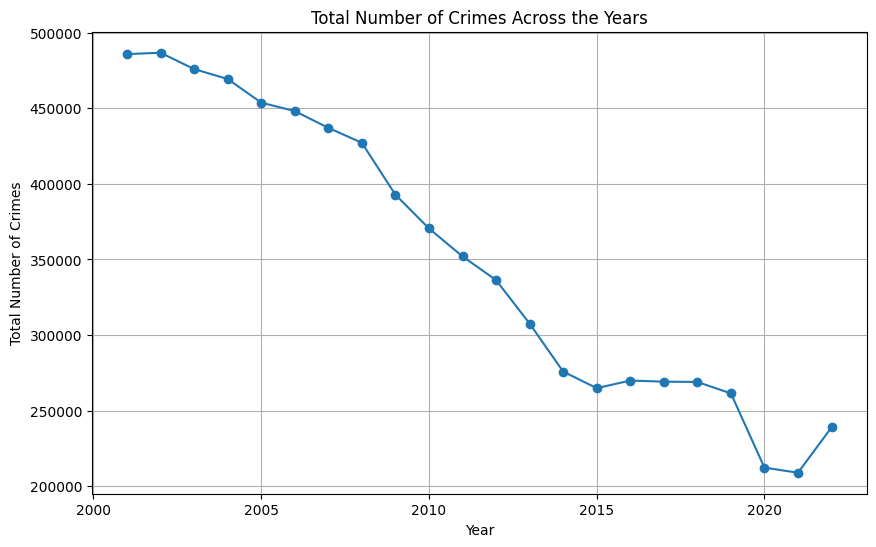

In [ ]:
# Create a list containing all the DataFrame objects
df_list = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15, df16, df17, df18, df19, df20, df21, df22]

# Concatenate all DataFrames into one DataFrame
all_data = pd.concat(df_list)

# Calculate the total number of crimes for each year
crime_counts_by_year = all_data.groupby(all_data.index.year).size()

# Plot the total number of crimes over the years
plt.figure(figsize=(10, 6))
crime_counts_by_year.plot(marker='o', linestyle='-')
plt.title('Total Number of Crimes Across the Years')
plt.xlabel('Year')
plt.ylabel('Total Number of Crimes')
plt.grid(True)
plt.show()




The crimes are generally decreasing over the years, however, there is a sudden increase in crime after 2020.

Topic 4) Comparing Months:

Answer the question: ​What months have the most crime? What months have the least?

Answer the question: Are there any individual crimes that do not follow this pattern? If so, which crimes?

In [ ]:
# Create a list containing all the DataFrame objects
df_list = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15, df16, df17, df18, df19, df20, df21, df22]

# Concatenate all DataFrames into one DataFrame
all_data = pd.concat(df_list)

# Aggregate data by month and count the number of crimes in each month
crime_counts_by_month = all_data.resample('M').size()

# Determine months with the most and least crime
month_most_crime = crime_counts_by_month.idxmax().strftime('%B')
month_least_crime = crime_counts_by_month.idxmin().strftime('%B')

print("Month with the most crime:", month_most_crime)
print("Month with the least crime:", month_least_crime)



Month with the most crime: July
Month with the least crime: April


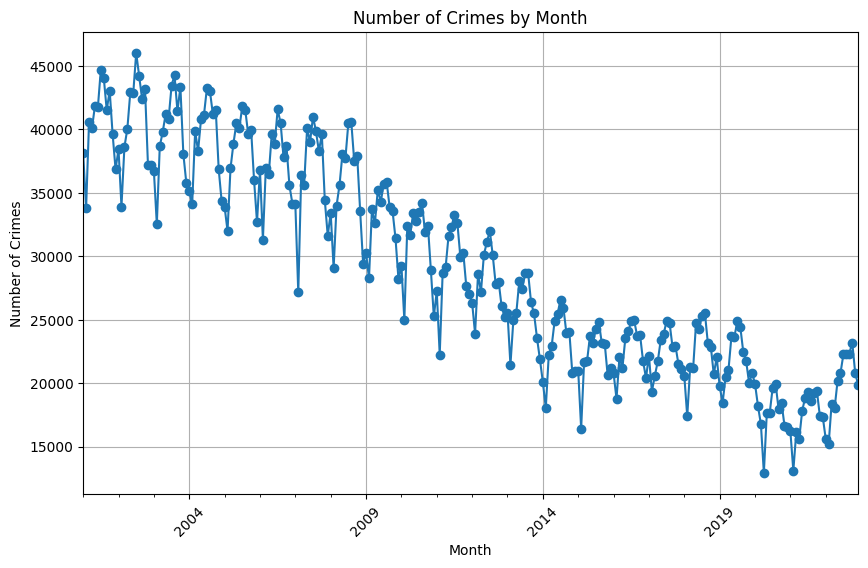

In [ ]:
# Plot the number of crimes by month
plt.figure(figsize=(10, 6))
crime_counts_by_month.plot(marker='o', linestyle='-')
plt.title('Number of Crimes by Month')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()



The crimes are decreasing across months apart from a random deviation after 2020.